## DATA TRAINING

In [30]:
import numpy as np
import pandas as pd
import math
import joblib

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("augmented_only.csv")
seed = 33
df

,time_Seconds,round_trip,stop,time,elapsed,lat,lon,next_stop
0,29734.0,NaN,6.0,8:15:34,NaN,18.403879,-66.048199,13.0
1,29808.0,NaN,13.0,8:16:48,74.0,18.403955,-66.049898,24.0
2,29927.0,NaN,23.0,8:18:47,119.0,18.406440,-66.050140,20.0
3,29967.0,NaN,20.0,8:19:27,40.0,18.407062,-66.049323,19.0
4,30010.0,NaN,19.0,8:20:10,43.0,18.406503,-66.048520,9.0
...,...,...,...,...,...,...,...,...
1083,52403.0,962.0,11.0,14:33:23,172.0,18.406078,-66.044770,2.1
1084,52525.0,761.0,2.1,14:35:25,122.0,18.406243,-66.043161,1.0
1085,52562.0,761.0,1.0,14:36:02,37.0,18.407170,-66.041989,2.2
1086,52753.0,761.0,4.0,14:39:13,191.0,18.403636,-66.045492,5.0


### Predicting time until next stop, USing synthethic data predicting real data

In [31]:
#modify if necessary
sub = df[['stop','time_Seconds','elapsed']]
sub = df.dropna()



####
### Testing and training with dif files
####

training = pd.read_csv("augmented_only.csv")
training['time_slot'] = training['time_Seconds']//3600
testing = pd.read_csv("cleaned.csv")
testing['time_slot'] =testing['time_Seconds']//3600
sub_testing = testing[['stop','time_Seconds','time_slot','elapsed']]
sub_testing = sub_testing.dropna()

sub_training = training[['stop','time_Seconds','time_slot','elapsed']]
sub_training = sub_training.dropna()

X_train = sub_training[['stop','time_Seconds']]
y_train= sub_training['elapsed']

X_test = sub_testing[['stop','time_Seconds']]
y_test = sub_testing['elapsed']



Sample times


/tmp/ipykernel_444/3328966224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['elapsed']=y_train
/tmp/ipykernel_444/3328966224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['elapsed_pred']=y_pred


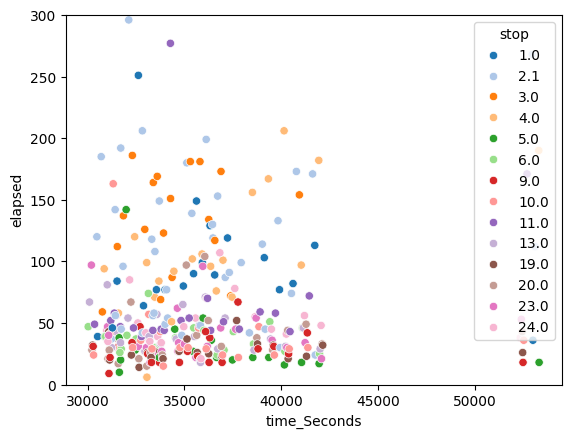

Augmented_only times


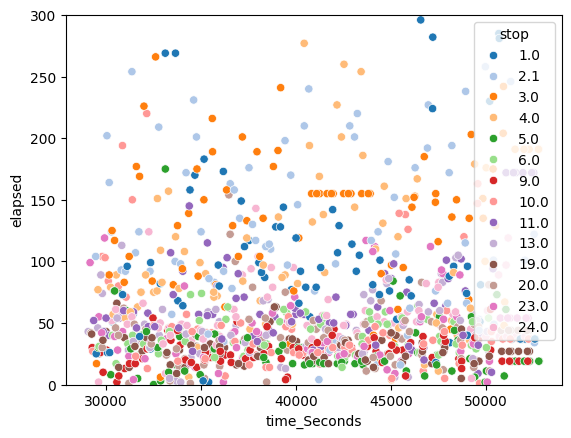

Predicted times


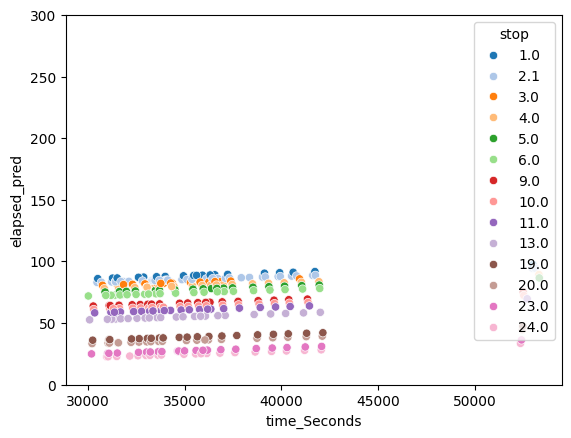

Differences between real and predicted times


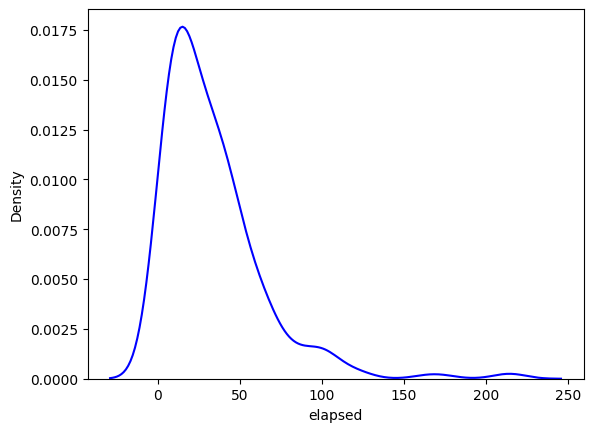

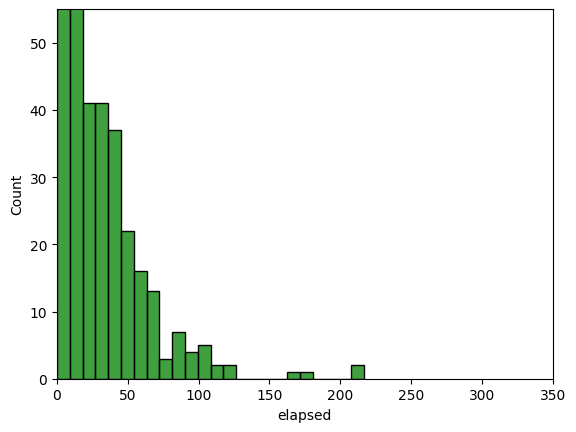

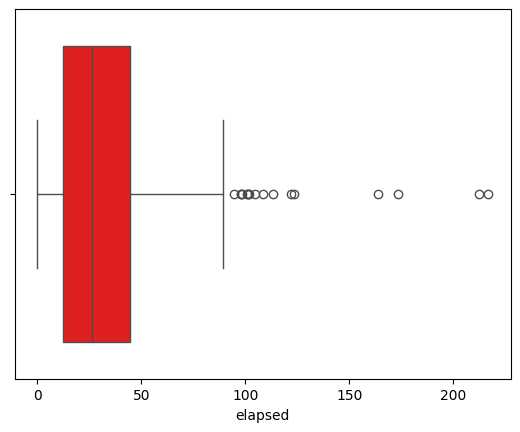

Statistical data
count    323.000000
mean      33.254698
std       30.864162
min        0.074926
25%       12.265445
50%       26.454955
75%       44.544066
max      216.760685
Name: elapsed, dtype: float64


In [32]:

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
X_train['elapsed']=y_train
#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print('Augmented_only times')
sns.scatterplot(data=X_train,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())



### training on synthethic, predicting real data, using time slot

In [20]:
training = pd.read_csv("augmented_only.csv")
training['time_slot'] = training['time_Seconds']//3600
testing = pd.read_csv("cleaned.csv")
testing['time_slot'] =testing['time_Seconds']//3600
sub_testing = testing[['stop','time_Seconds','time_slot','elapsed']]
sub_testing = sub_testing.dropna()

sub_training = training[['stop','time_Seconds','time_slot','elapsed']]
sub_training = sub_training.dropna()


,lat,lon,time,stop,next_stop,elapsed,time_Seconds,round_trip,time_slot
0,18.403981,-66.046373,8:42:35,5.0,6.0,NaN,31355,NaN,8
1,18.404105,-66.048489,8:43:13,6.0,13.0,38.0,31393,NaN,8
2,18.404201,-66.049903,8:43:56,13.0,24.0,43.0,31436,NaN,8
3,18.405122,-66.050338,8:44:52,24.0,23.0,56.0,31492,NaN,8
4,18.406180,-66.050259,8:45:22,23.0,20.0,30.0,31522,NaN,8
...,...,...,...,...,...,...,...,...,...
331,18.403958,-66.049795,11:40:9,13.0,24.0,29.0,42009,867.0,11
332,18.404569,-66.050380,11:40:57,24.0,23.0,48.0,42057,859.0,11
333,18.406081,-66.050287,11:41:18,23.0,20.0,21.0,42078,846.0,11
334,18.406994,-66.049228,11:41:51,20.0,19.0,33.0,42111,830.0,11


Sample times


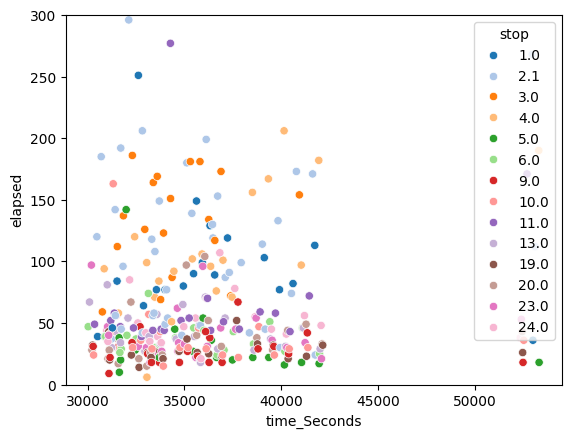

Augmented_only times


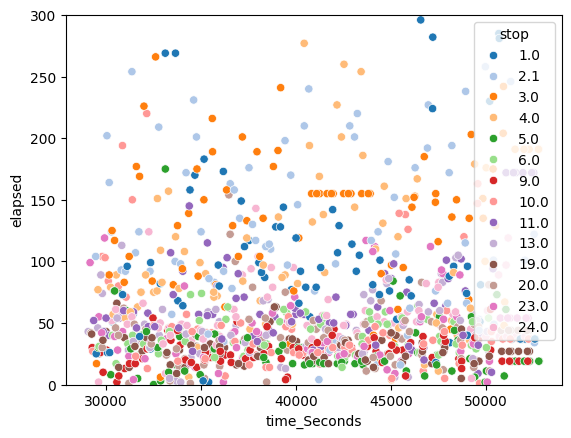

Predicted times


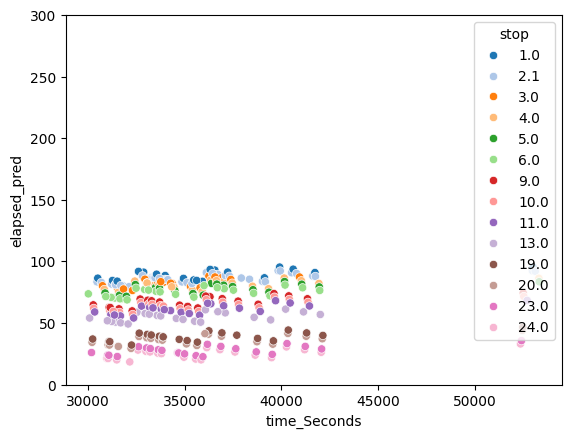

Differences between real and predicted times


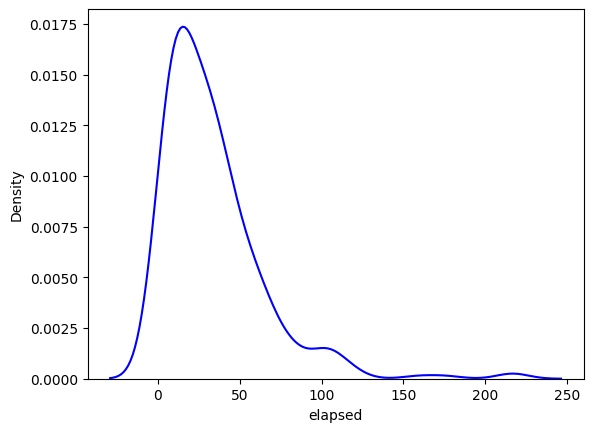

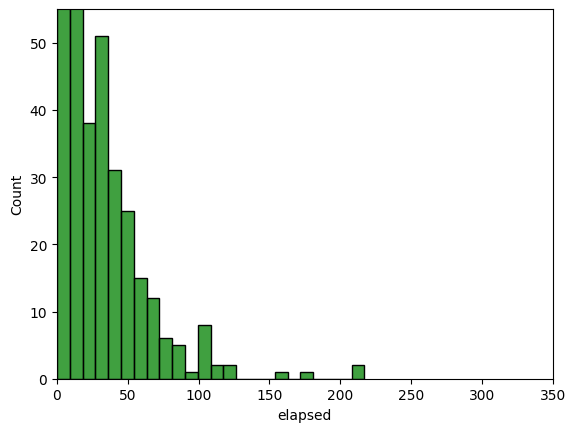

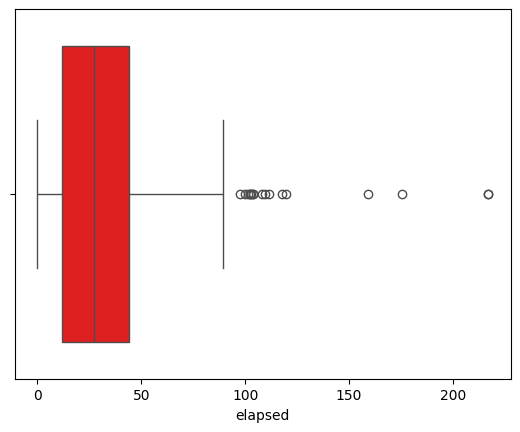

Statistical data
count    323.000000
mean      33.428687
std       31.034102
min        0.076555
25%       11.981256
50%       27.223322
75%       44.117254
max      216.954618
Name: elapsed, dtype: float64


In [34]:

# training = training.dropna()
# testing = testing.dropna()

# X = training[['stop','time_slot','time_Seconds']]
# y = training['elapsed']

#Linear Regression
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=seed)
X_train = sub_training[['stop','time_slot','time_Seconds']]
y_train= sub_training['elapsed']
X_test = sub_testing[['stop','time_slot','time_Seconds']]
y_test = sub_testing['elapsed']

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

augment_data = X_train
augment_data['elapsed']=y_train

print('Augmented_only times')
sns.scatterplot(data=augment_data,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())




### Training Testing without time slot

Sample times


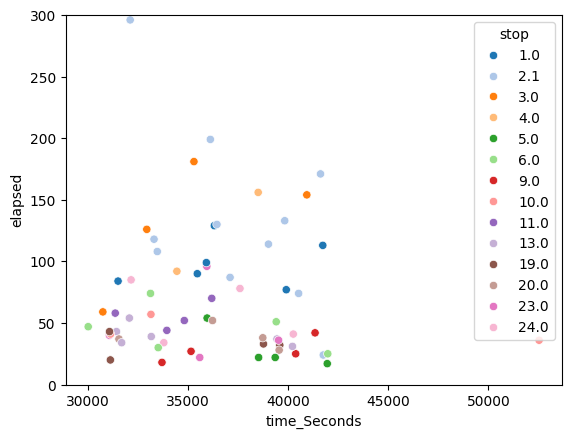

Predicted times


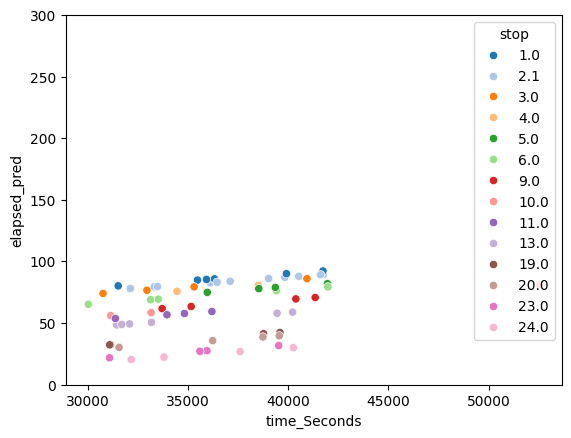

Differences between real and predicted times


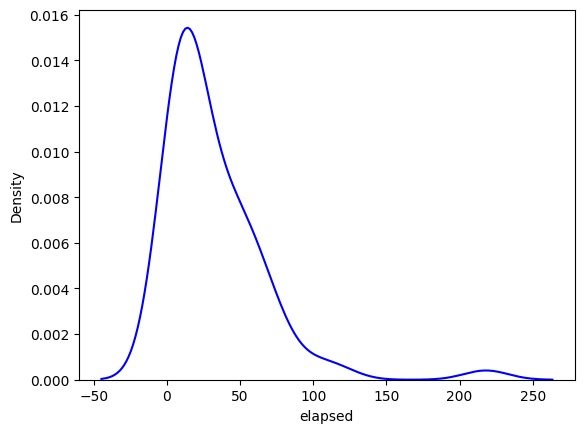

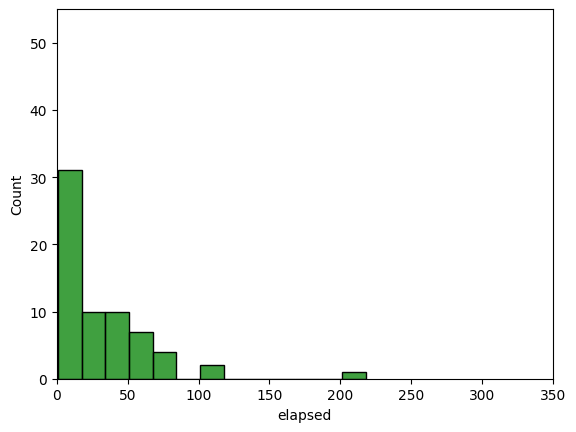

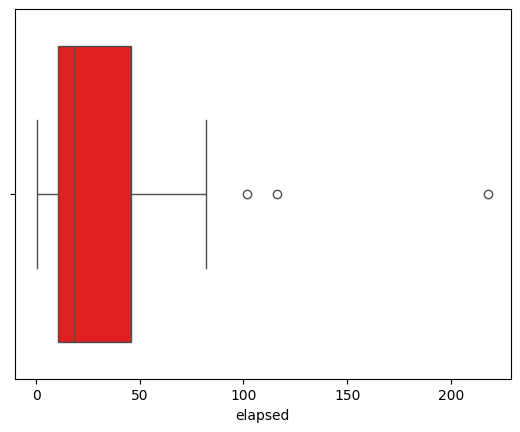

Statistical data
count     65.000000
mean      32.281383
std       34.904015
min        0.652854
25%       10.730219
50%       18.263370
75%       45.953457
max      218.043486
Name: elapsed, dtype: float64


In [35]:
df = pd.read_csv("cleaned.csv")
df['time_slot'] = df['time_Seconds']//3600
sub_df = df[['stop','time_Seconds','time_slot','elapsed']]
sub_df = sub_df.dropna()
X = sub_df[['stop','time_Seconds']]
y = sub_df['elapsed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# print(len(X_train), len(X_test)) Output (258, 65)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

augment_data = X_train
augment_data['elapsed']=y_train

# print('Augmented_only times')
# sns.scatterplot(data=augment_data,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
# plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())




### Training and testing on 80/20 real data With Time Slot

Sample times


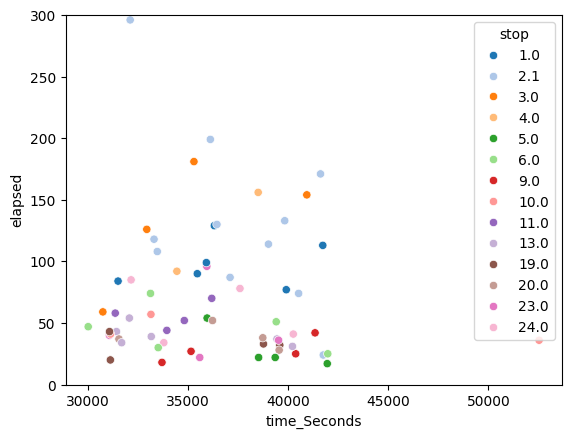

Predicted times


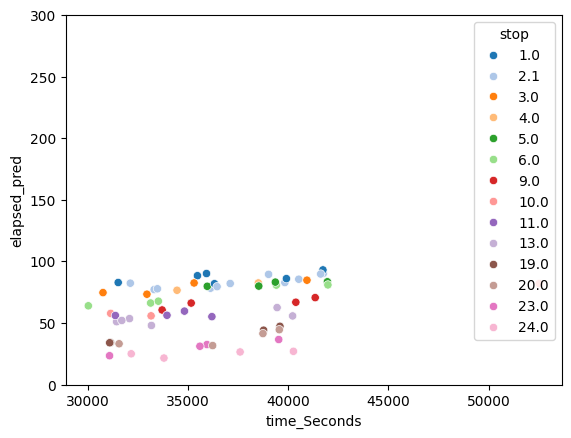

Differences between real and predicted times


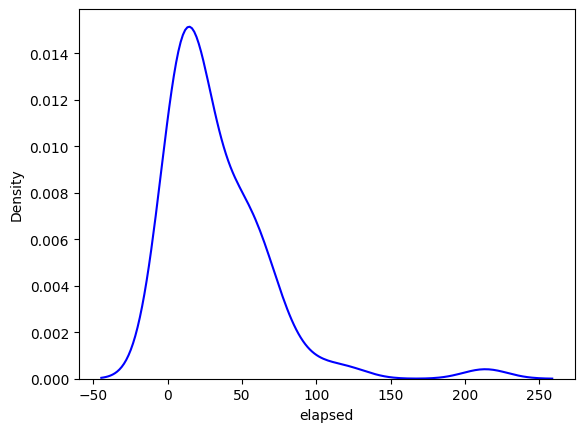

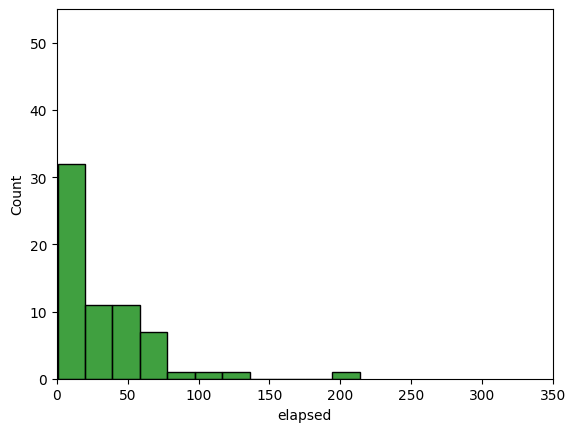

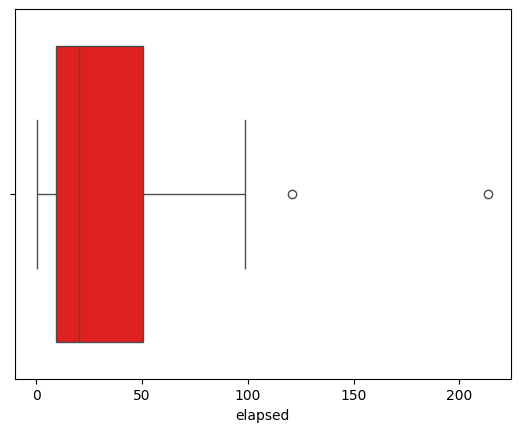

Statistical data
count     65.000000
mean      32.721899
std       34.636677
min        0.457265
25%        9.120402
50%       19.920741
75%       50.174061
max      213.694667
Name: elapsed, dtype: float64


In [36]:
df = pd.read_csv("cleaned.csv")
df['time_slot'] = df['time_Seconds']//3600
sub_df = df[['stop','time_Seconds','time_slot','elapsed']]
sub_df = sub_df.dropna()
X = sub_df[['stop','time_slot','time_Seconds']]
y = sub_df['elapsed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# print(len(X_train), len(X_test)) Output (258, 65)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

augment_data = X_train
augment_data['elapsed']=y_train

# print('Augmented_only times')
# sns.scatterplot(data=augment_data,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
# plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())




### augmented data _mix real data and synthethic_ without time slot 80/20

Sample times


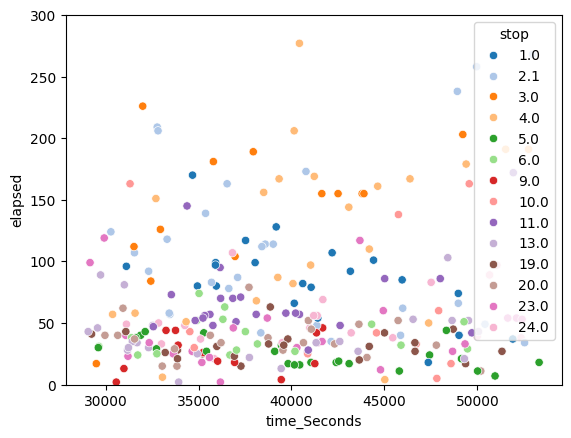

Predicted times


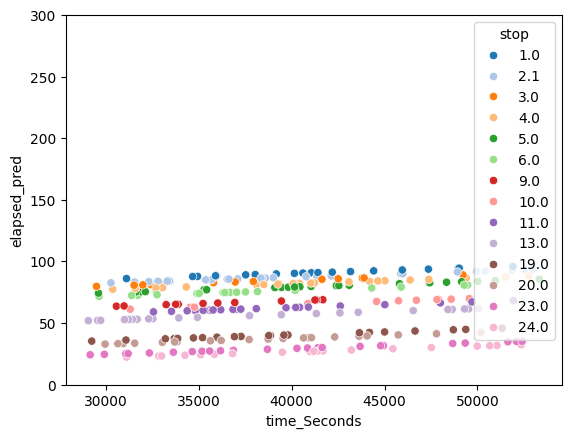

Differences between real and predicted times


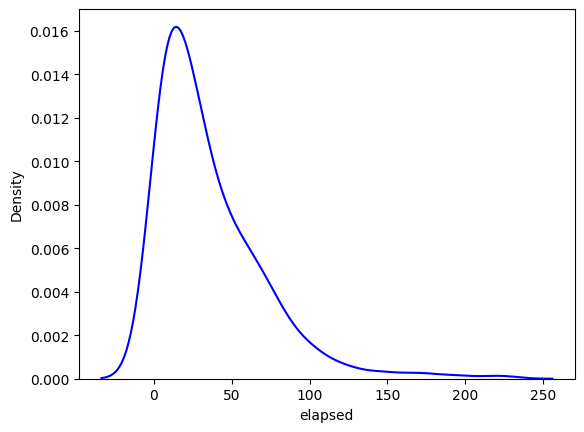

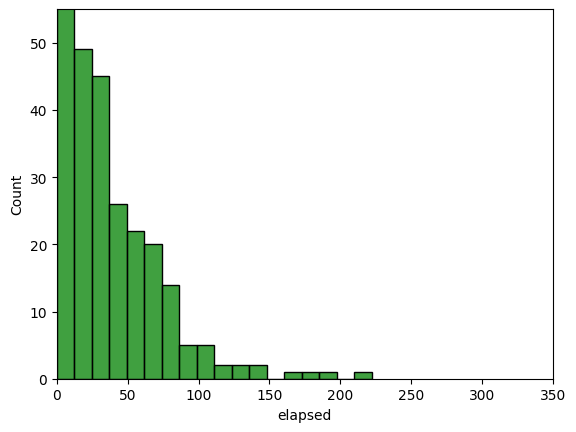

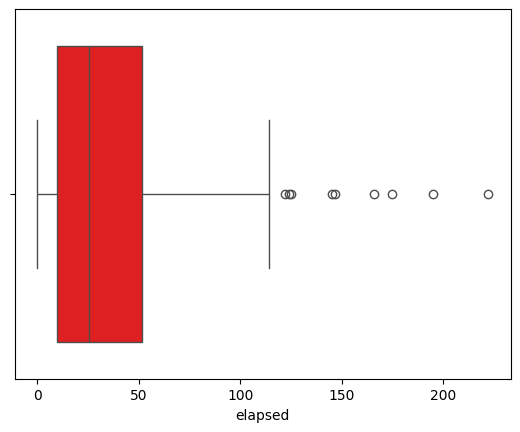

Statistical data
count    282.000000
mean      35.970253
std       34.696114
min        0.030860
25%        9.487024
50%       25.527437
75%       51.448475
max      222.219578
Name: elapsed, dtype: float64


In [39]:
training = pd.read_csv("augmented.csv")

### WHAT IF WE USE the combined and shuffle
training['time_slot'] = training['time_Seconds']//3600
sub = training[['stop','time_Seconds','elapsed']]
sub = sub.dropna()
X = sub[['stop','time_Seconds']]
y = sub['elapsed']

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

### Agumented mixed with time slot

Sample times


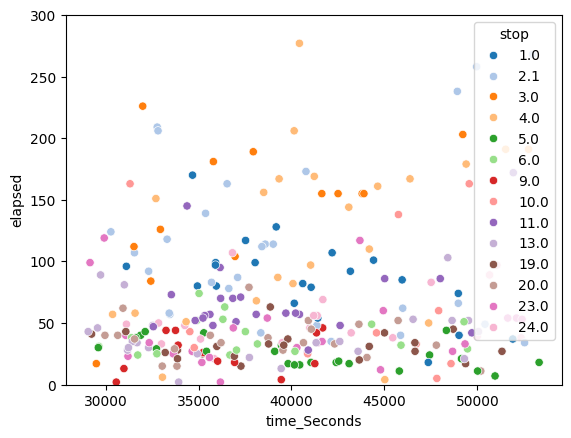

Predicted times


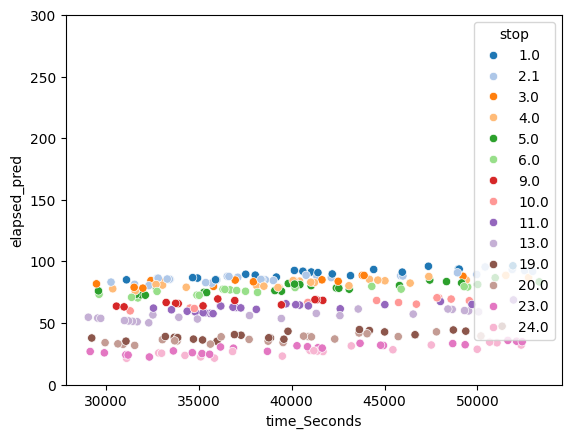

Differences between real and predicted times


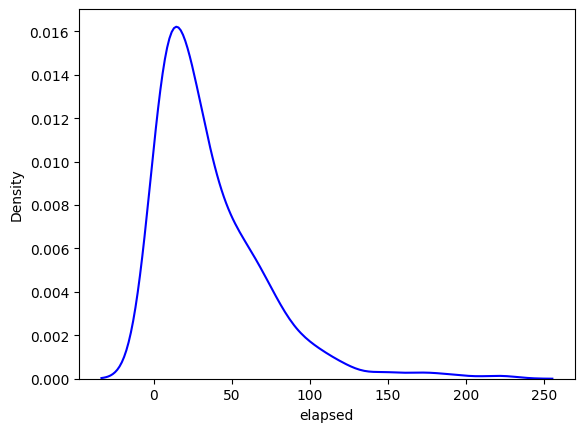

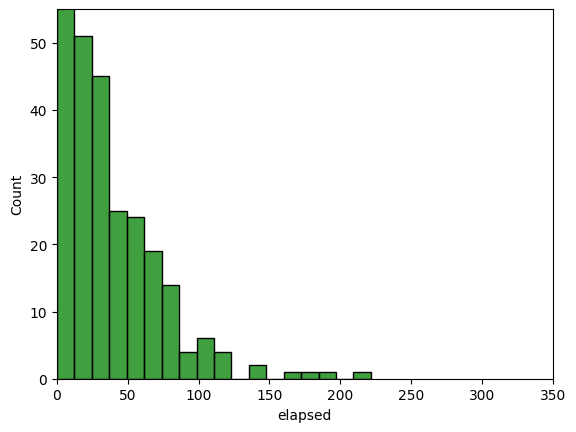

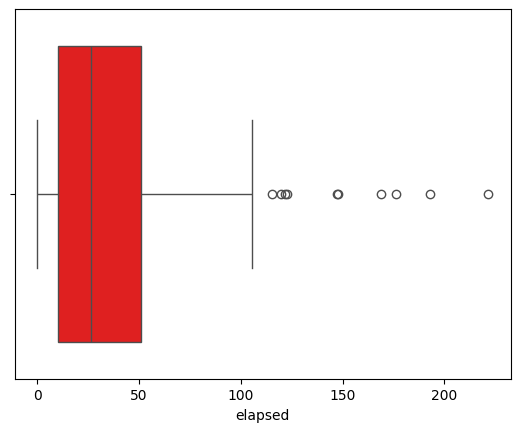

Statistical data
count    282.000000
mean      35.941228
std       34.709662
min        0.112255
25%       10.338804
50%       26.328265
75%       50.813792
max      221.564649
Name: elapsed, dtype: float64


In [40]:
training = pd.read_csv("augmented.csv")

### WHAT IF WE USE the combined and shuffle
training['time_slot'] = training['time_Seconds']//3600
sub = training[['stop','time_Seconds','time_slot','elapsed']]
sub = sub.dropna()
X = sub[['stop','time_slot','time_Seconds']]
y = sub['elapsed']

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.ylim(0, 300)
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

In [ ]:
#save model
joblib.dump(reg,"model.pkl")

In [ ]:
pred

,stop,time_Seconds,elapsed_pred,elapsed
258,24.0,32503.0,-3.670920,28.0
348,24.0,33267.0,-2.606182,29.0
344,4.0,33094.0,104.630973,52.0
315,5.0,31185.0,96.596608,35.0
71,1.0,34459.0,122.655025,59.0
...,...,...,...,...
40,2.1,32376.0,113.840776,22.0
15,5.0,30948.0,96.266316,29.0
102,2.2,31654.0,112.297179,207.0
215,20.0,33814.0,19.651788,16.0


In [ ]:
pred['stop'].unique()

array([24. ,  4. ,  5. ,  1. ,  2.1,  2.2, 11. , 10. ,  6. , 23. , 20. ,
        3. , 13. , 19. ,  9. ])

In [ ]:
pred[pred['elapsed_pred'] < 0]

,stop,time_Seconds,elapsed_pred,elapsed
258,24.0,32503.0,-3.670920,28.0
348,24.0,33267.0,-2.606182,29.0
363,24.0,34473.0,-0.925456,30.0
19,23.0,31132.0,-0.207683,13.0
243,24.0,31481.0,-5.095216,40.0
198,24.0,32809.0,-3.244467,31.0
94,23.0,30913.0,-0.512889,14.0
318,24.0,31327.0,-5.309836,31.0
123,24.0,33146.0,-2.774812,28.0
333,24.0,32276.0,-3.987276,27.0


In [5]:
pred['time_slot'] = pred['time_Seconds']//3600

In [6]:
pred[pred['stop']==1]

,stop,time_Seconds,elapsed_pred,elapsed,time_slot
26,1.0,32883,88.249230,64.0,9
41,1.0,33995,88.857725,77.0,9
56,1.0,34941,89.375384,80.0,9
72,1.0,35922,89.912195,99.0,9
122,1.0,31275,87.369320,46.0,8
140,1.0,30512,86.951801,39.0,8
155,1.0,31515,87.500650,84.0,8
167,1.0,32617,88.103673,251.0,9
183,1.0,33550,88.614218,77.0,9
197,1.0,35470,89.664857,90.0,9


In [7]:
pred

,stop,time_Seconds,elapsed_pred,elapsed,time_slot
1,6.0,31393,73.591209,38.0,8
2,13.0,31436,54.234985,43.0,8
3,24.0,31492,23.811729,56.0,8
4,23.0,31522,26.596681,30.0,8
5,20.0,31559,34.922537,37.0,8
...,...,...,...,...,...
331,13.0,42009,60.020612,29.0,11
332,24.0,42057,29.592979,48.0,11
333,23.0,42078,32.373006,21.0,11
334,20.0,42111,40.696673,33.0,11


In [8]:
new_df = pred.groupby(['stop', 'time_slot']).mean().reset_index()

In [9]:
df_database = new_df.drop(['time_Seconds','elapsed'], axis=1)

In [10]:
df_database

,stop,time_slot,elapsed_pred
0,1.0,8,87.273924
1,1.0,9,89.065459
2,1.0,10,90.670077
3,1.0,11,92.553931
4,1.0,14,99.258503
...,...,...,...
62,24.0,8,23.772330
63,24.0,9,25.224825
64,24.0,10,27.231230
65,24.0,11,29.108517


## ANN????

In [26]:
import torch
from torch import nn
import torch.nn.init as init

class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(input_size, 25)
        self.layer2 = nn.Linear(25, 25)
        self.layer2_5 = nn.Linear(25, 25)
        self.layer3 = nn.Linear(25, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.batchnorm1 = nn.BatchNorm1d(25)
        self.batchnorm2 = nn.BatchNorm1d(25)
        self.batchnorm2_5 = nn.BatchNorm1d(25)
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.uniform_(m.weight)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.relu(self.layer2_5(x))
        x = self.batchnorm2_5(x)
        x = self.dropout(x)
        x = self.layer3(x)
        return x

# Initialize the model with the


from torch.nn import functional as F
import numpy as np

## mapping of stop ids 


##PREPARING DATASET

training = pd.read_csv("augmented.csv")
testing = pd.read_csv("cleaned.csv")
training = training.dropna()

stop_ids_unique = training['stop'].unique()
stop_ids = training['stop'].values

print(stop_ids_unique)
stop_ids_mapping = {stop_id: i for i, stop_id in enumerate(stop_ids_unique)}


## convert to ints
stop_ids_int = [stop_ids_mapping[stop_id] for stop_id in stop_ids]
stop_ids_tensor = torch.tensor(stop_ids_int)
print(stop_ids_tensor)


stop_ids_one_hot = torch.nn.functional.one_hot(stop_ids_tensor)

print(stop_ids_one_hot.shape)



[ 5.   6.  13.  23.  20.  19.   9.  10.  11.   2.1  1.   3.   4.  24. ]
tensor([ 0,  1,  2,  ..., 10, 12,  0])
torch.Size([1424, 14])


In [12]:
### after stops are one hot encoded, now lets 
time_seconds = torch.tensor(training['time_Seconds'].values)

#Normalizing the 
timestamps_normalized = (time_seconds - time_seconds.min()) / (time_seconds.max() - time_seconds.min())
timestamps_normalized = timestamps_normalized.reshape(-1,1)
print(stop_ids_one_hot.dtype)
print(timestamps_normalized.dtype)


torch.int64
torch.float64


torch.float64

In [ ]:

#concatted
input_data = torch.cat((stop_ids_one_hot, timestamps_normalized), dim=1)
input_data.dtype


### Ahora crear dataloader y tensor dataset 

In [13]:
 training[training['elapsed'].isnull()]

,time_Seconds,round_trip,stop,time,elapsed,lat,lon,next_stop
0,28896.0,NaN,6.0,8:01:36,NaN,18.403879,-66.048199,13.0
358,29070.0,NaN,6.0,8:04:30,NaN,18.403879,-66.048199,13.0
730,29839.0,NaN,6.0,8:17:19,NaN,18.403879,-66.048199,13.0
1088,29188.0,NaN,6.0,8:06:28,NaN,18.403879,-66.048199,13.0
1432,28893.0,NaN,6.0,8:01:33,NaN,18.403879,-66.048199,13.0


In [14]:
from torch.utils.data import TensorDataset, DataLoader

targets = torch.tensor(training['elapsed'].values).reshape(-1,1)
## el nan lo convertí con el valor de arriba
input_data = input_data.float()

targets = targets.float()   
targets[0]=27.0
targets[372]=27.0
print(torch.isnan(targets).any())
# print(torch.isnan(input_data).any())
dataset = TensorDataset(input_data, targets)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
model = ANN(input_size=input_data.shape[1])
epochs = 500
lr = 0.001
decay = 0.000000001
criterion = nn.Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)

for epoch in range(epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

tensor(True)
Epoch 10/500, Loss: 47.48163986206055
Epoch 20/500, Loss: 42.90589904785156
Epoch 30/500, Loss: 24.65989875793457
Epoch 40/500, Loss: 32.926048278808594
Epoch 50/500, Loss: 41.26614761352539
Epoch 60/500, Loss: 29.022245407104492
Epoch 70/500, Loss: 28.778623580932617
Epoch 80/500, Loss: 20.99686622619629
Epoch 90/500, Loss: 25.277494430541992
Epoch 100/500, Loss: 38.87507629394531
Epoch 110/500, Loss: 29.16175651550293
Epoch 120/500, Loss: 21.73102378845215


KeyboardInterrupt: 

Sample times


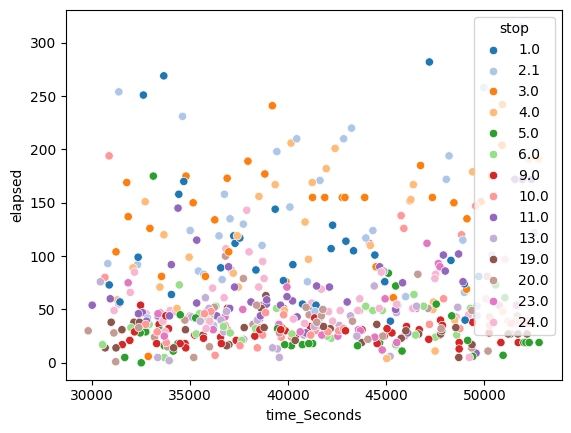

Predicted times


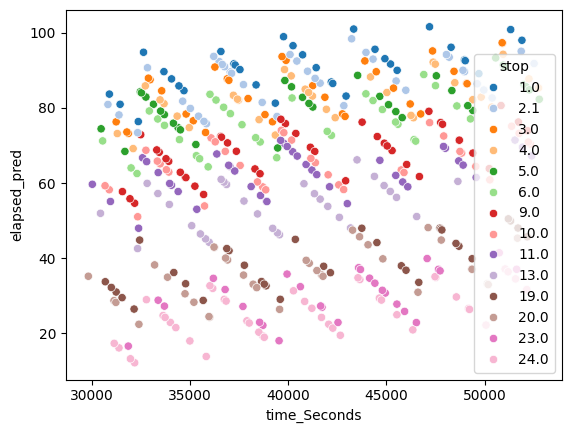

Differences between real and predicted times


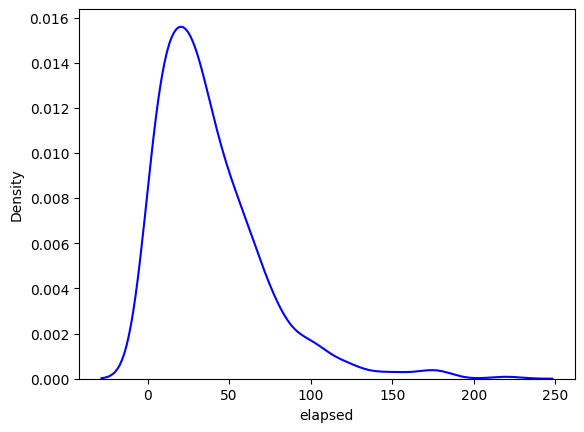

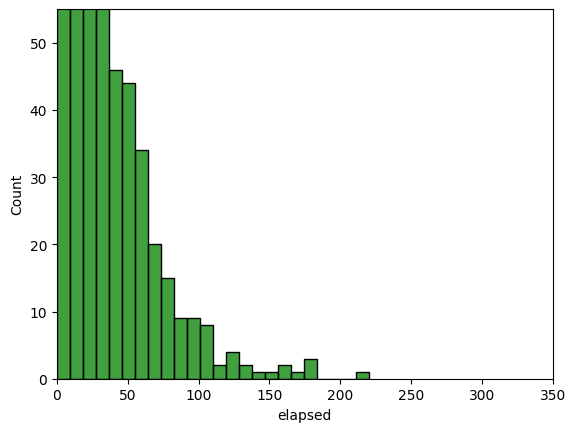

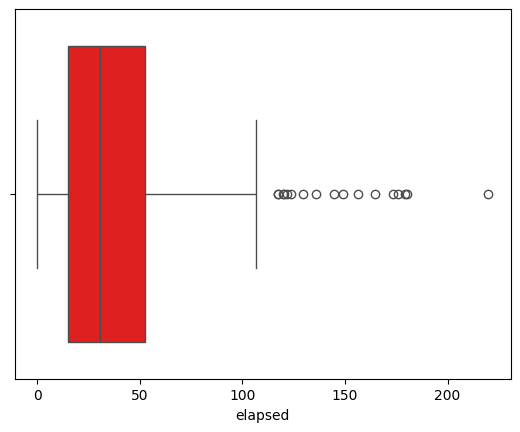

Statistical data
count    494.000000
mean      38.381992
std       32.726046
min        0.039757
25%       15.130644
50%       30.747361
75%       52.574489
max      219.883679
Name: elapsed, dtype: float64


In [3]:
training = pd.read_csv("augmented.csv")

### WHAT IF WE USE the combined and shuffle
training['time_slot'] = training['time_Seconds']//3600
sub = training.dropna()
X = sub[['stop','time_slot','time_Seconds']]
y = sub['elapsed']

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

,time_Seconds,round_trip,stop,time,elapsed,lat,lon,next_stop,time_slot
0,28896.0,NaN,6.0,8:01:36,NaN,18.403879,-66.048199,13.0,8.0
1,28961.0,NaN,13.0,8:02:41,65.0,18.403955,-66.049898,24.0,8.0
2,29055.0,NaN,23.0,8:04:15,94.0,18.406440,-66.050140,20.0,8.0
3,29109.0,NaN,20.0,8:05:09,54.0,18.407062,-66.049323,19.0,8.0
4,29139.0,NaN,19.0,8:05:39,30.0,18.406503,-66.048520,9.0,8.0
...,...,...,...,...,...,...,...,...,...
1785,51718.0,850.0,11.0,14:21:58,172.0,18.406078,-66.044770,2.1,14.0
1786,51799.0,720.0,2.1,14:23:19,81.0,18.406243,-66.043161,1.0,14.0
1787,51836.0,720.0,1.0,14:23:56,37.0,18.407170,-66.041989,2.2,14.0
1788,52027.0,720.0,4.0,14:27:07,191.0,18.403636,-66.045492,5.0,14.0
